In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

In [ ]:
print("Please upload the Wine.csv file")
uploaded = files.upload()

df = pd.read_csv("Wine.csv")

Please upload the Wine.csv file


Saving Wine.csv to Wine (1).csv


In [ ]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [ ]:
print("\nFirst five rows of the dataset:")
print(df.head())


First five rows of the dataset:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065    

In [ ]:
print("\nBasic statistical summary:")
print(df.describe())


Basic statistical summary:
          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000

In [ ]:
df_long = df.melt(var_name="Attributes", value_name="Value")  # Convert to long format

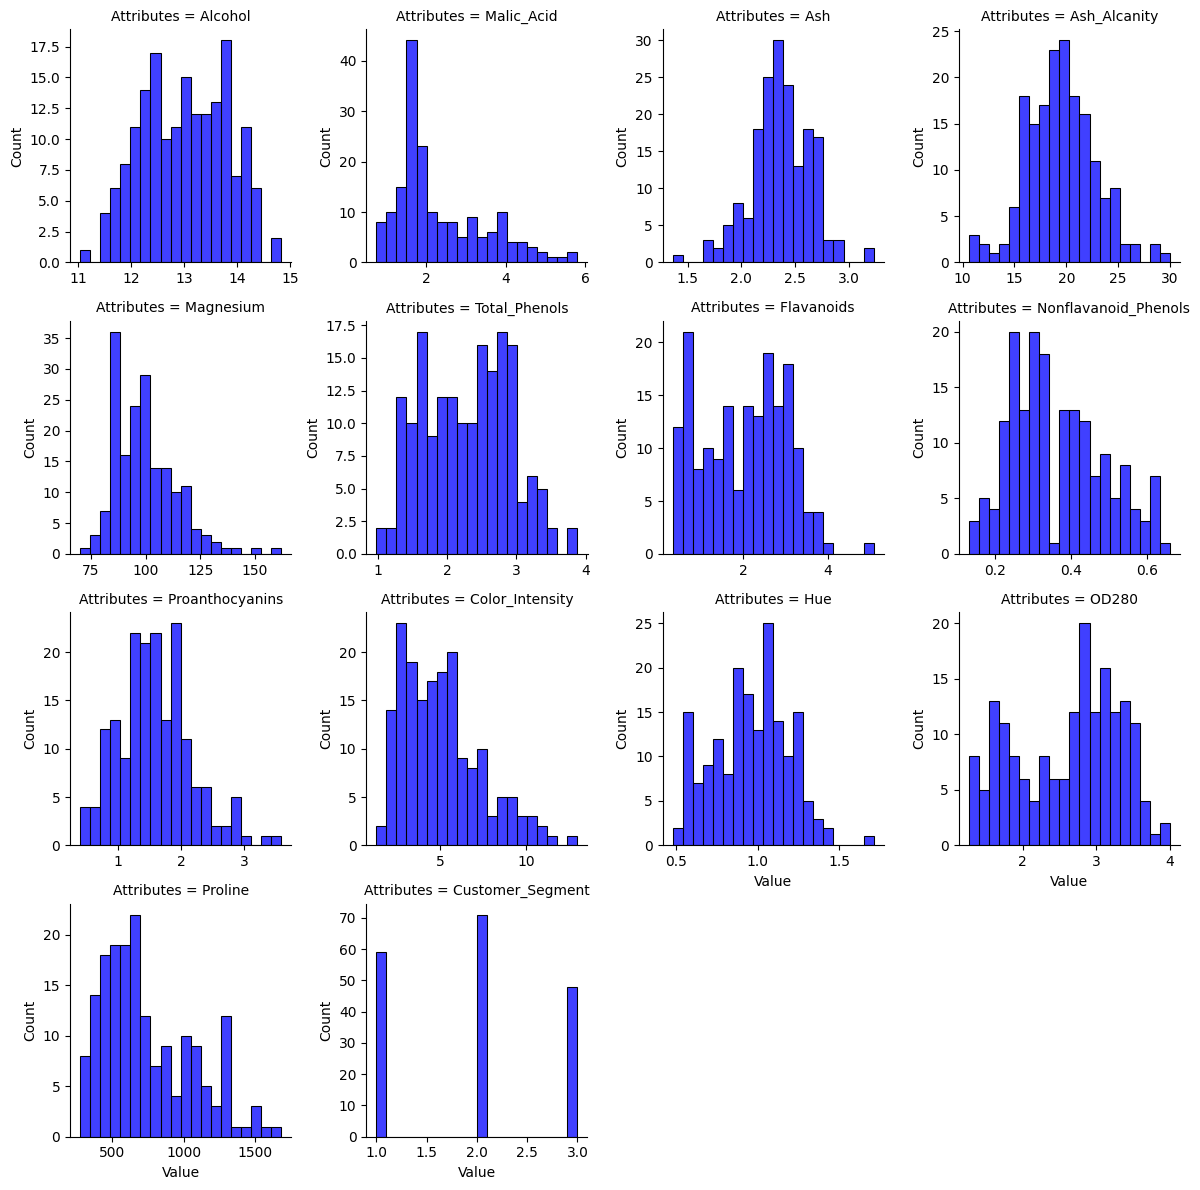

In [ ]:
g = sns.FacetGrid(df_long, col="Attributes", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="Value", bins=20, color="blue", edgecolor="black")

In [ ]:
g.set_axis_labels("Values", "Frequency")
g.fig.suptitle("Wines Attributes - Histograms", fontsize=14)
plt.show()

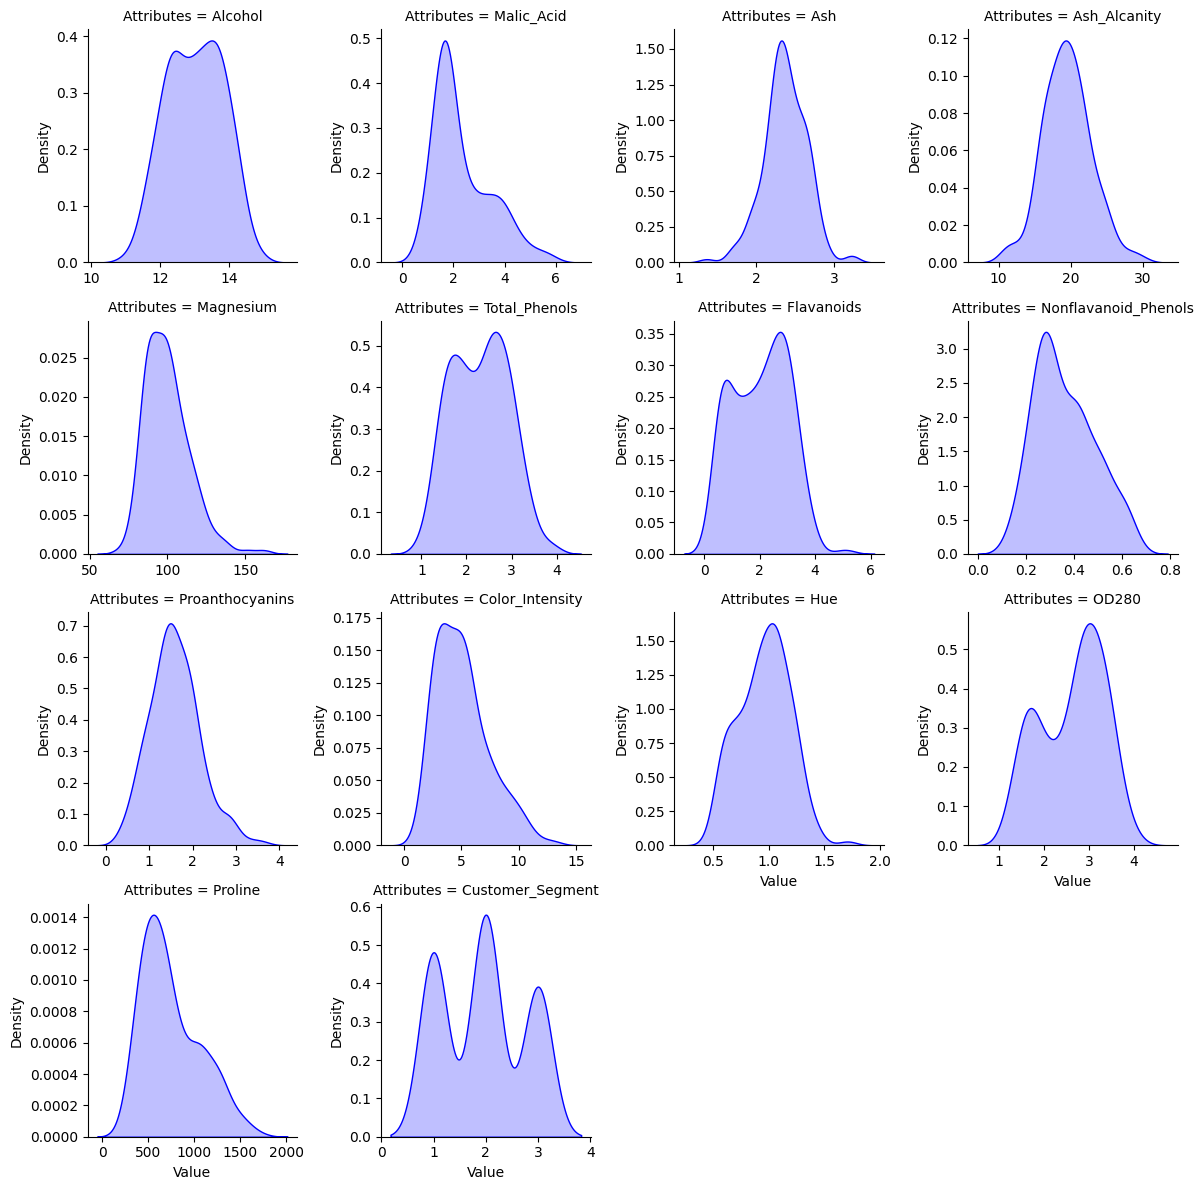

In [ ]:
g = sns.FacetGrid(df_long, col="Attributes", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.kdeplot, x="Value", fill=True, color="blue")

In [ ]:
g.set_axis_labels("Values", "Density")
g.fig.suptitle("Wines Attributes - Density Plots", fontsize=14)
plt.show()

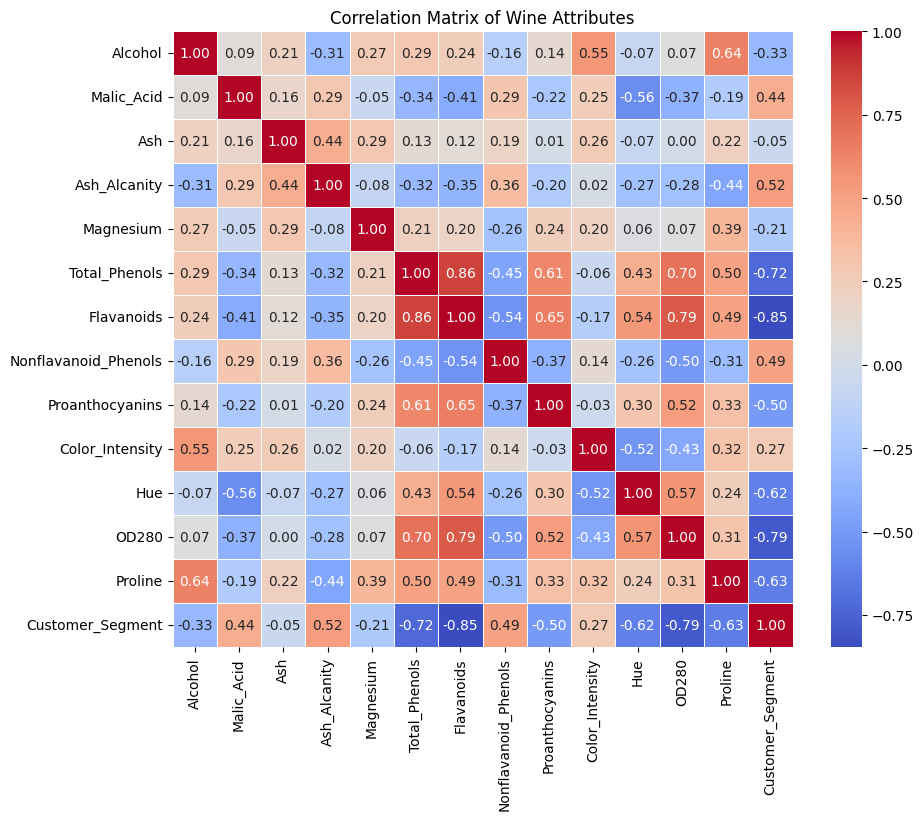

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Wine Attributes")
plt.show()

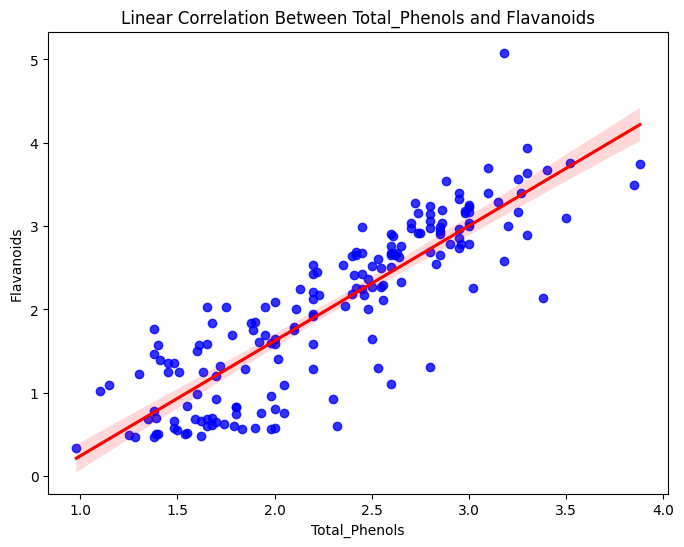

Pearson Correlation Coefficient: 0.86
P-value: 0.00000


In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df["Total_Phenols"], y=df["Flavanoids"], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.xlabel("Total_Phenols")
plt.ylabel("Flavanoids")
plt.title("Linear Correlation Between Total_Phenols and Flavanoids")
plt.show()

correlation_coefficient, p_value = pearsonr(df["Total_Phenols"], df["Flavanoids"])
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.5f}")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  Cluster  
0   3.92     1065                 1        0 

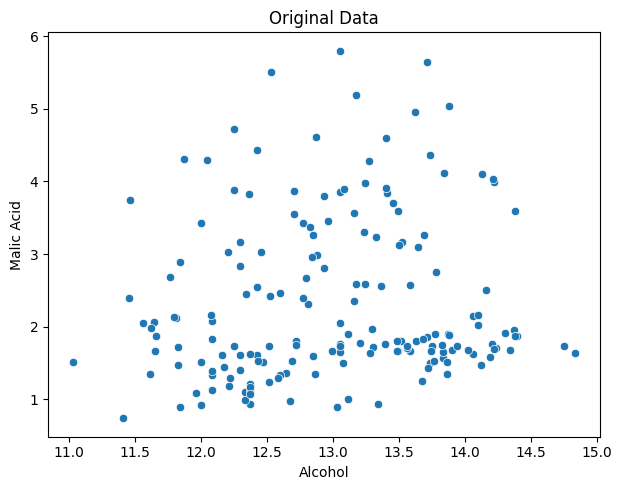

In [ ]:
#k-means execution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

print(df.head())

# Assuming 'Alcohol' and 'Malic_Acid' are the relevant columns
if 'target' in df.columns:
    df = df.drop(columns=['target'])

# Normalization using StandardScaler
scaler = StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plot original data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="Alcohol", y="Malic_Acid")
plt.title("Original Data")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")


plt.tight_layout()
plt.show()


Please upload the Wine.csv file


Saving Wine.csv to Wine (2).csv


<ipython-input-21-6025b51da0cc>:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


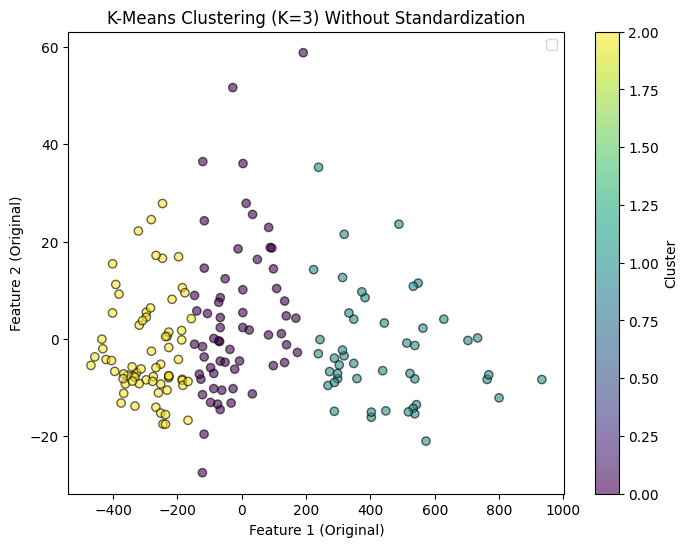

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
print("Please upload the Wine.csv file")
uploaded = files.upload()

df = pd.read_csv("Wine.csv")

# Selecting features for clustering (excluding the target variable 'Customer_Segment')
X = df.drop(columns=['Customer_Segment'])

# Applying K-Means clustering with K=3 without standardizing the data
kmeans_no_scaling = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster_No_Scaling'] = kmeans_no_scaling.fit_predict(X)

# Getting cluster centers
cluster_centers_no_scaling = kmeans_no_scaling.cluster_centers_

# prompt: get first two principle components of X

from sklearn.decomposition import PCA

# Assuming X is defined as in the previous code (features excluding 'Customer_Segment')
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

principal_components

# Visualizing the clusters using the first two features (without scaling)
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['Cluster_No_Scaling'], cmap='viridis', alpha=0.6, edgecolors='k')
plt.xlabel("Feature 1 (Original)")
plt.ylabel("Feature 2 (Original)")
plt.title("K-Means Clustering (K=3) Without Standardization")
plt.colorbar(label="Cluster")
plt.legend()
plt.show()



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [ ]:
if 'Cluster' not in df.columns:
    # If not present, assume we need to perform clustering first
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    df["Cluster"] = kmeans.fit_predict(df_scaled)

# Now you can safely drop the 'Cluster' column
X = df.drop(columns=["Cluster"])
y = df["Cluster"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (142, 15), Testing set: (36, 15)



Decision Tree Accuracy: 0.97

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



<Figure size 600x400 with 0 Axes>

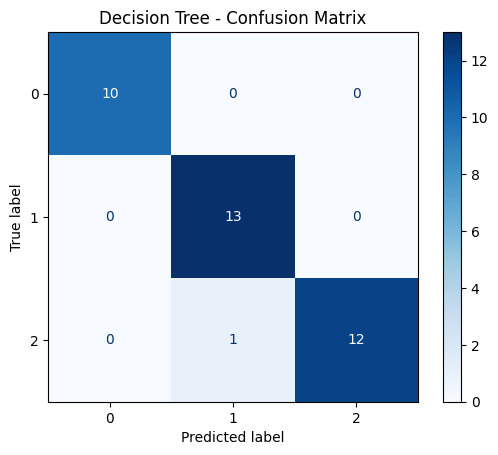

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Accuracy: {dt_accuracy:.2f}")

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(6, 4))
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt).plot(cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


Random Forest Accuracy: 1.00

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



<Figure size 600x400 with 0 Axes>

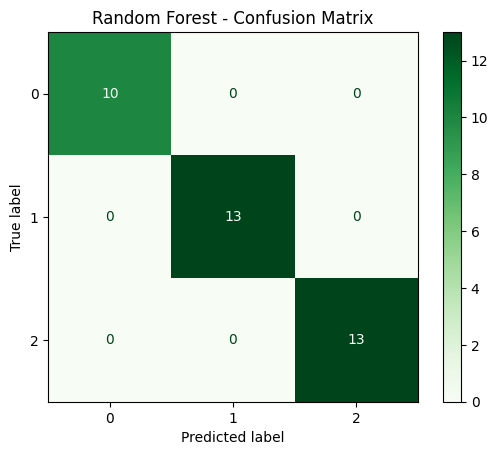

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {rf_accuracy:.2f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(6, 4))
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.show()


Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Best Random Forest Accuracy: 1.00

Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



<Figure size 600x400 with 0 Axes>

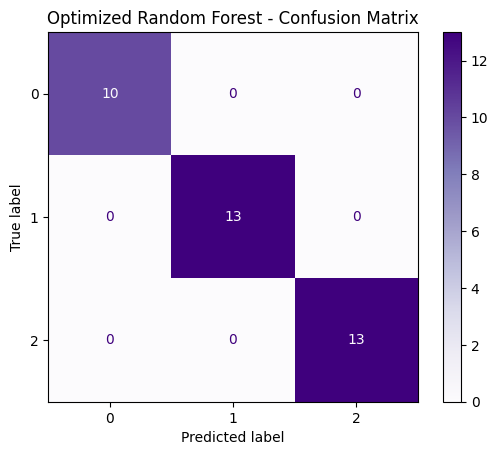

In [ ]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("\nBest Hyperparameters for Random Forest:")
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
print(f"\nBest Random Forest Accuracy: {best_rf_accuracy:.2f}")

print("\nBest Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

plt.figure(figsize=(6, 4))
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
ConfusionMatrixDisplay(cm_best_rf).plot(cmap="Purples")
plt.title("Optimized Random Forest - Confusion Matrix")
plt.show()
